In [1]:
import sys, os, time, re, h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Gravitational Wave Reach Plot

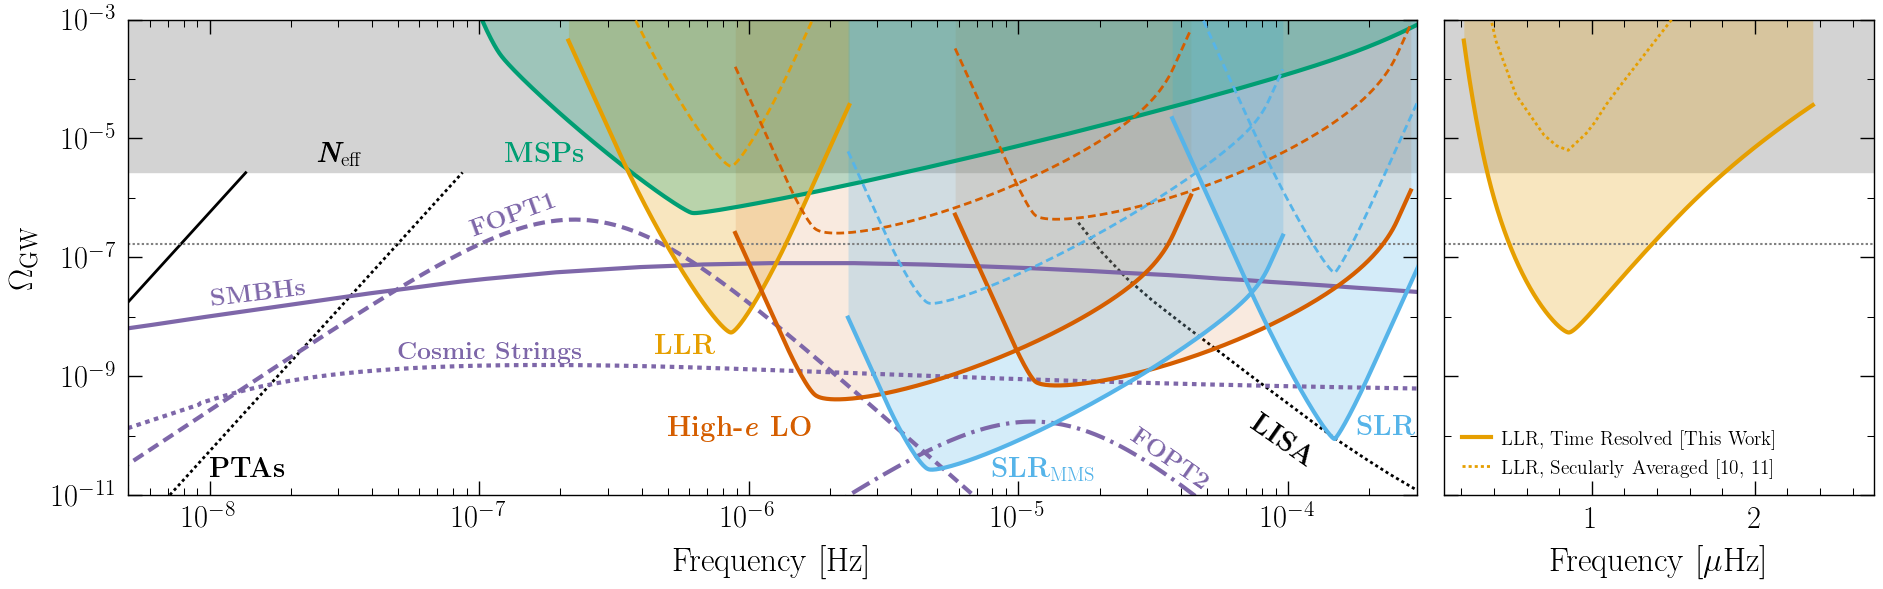

In [2]:
file = h5py.File('./data/gw_data.h5', 'r')
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize = (19, 6))

#############################################
###   Other Constraints and Projections   ###
#############################################

axs[0].plot(file['LISA_Projection'][0], file['LISA_Projection'][1], lw = 2, color='black', zorder = -100, ls = ':')
axs[0].plot(file['PTA_Present'][0], file['PTA_Present'][1], lw = 2, color = "black")
axs[0].plot(file['PTA_Future'][0], file['PTA_Future'][1], ls = ':', lw = 2, color='black')

axs[0].axhspan(2.7e-6, 1e0, alpha = 1, color = 'lightgrey')
axs[0].axhline(1.7e-7, color = "grey", ls = ':')

#############################
###   Binary Resonances   ###
#############################

axs[0].fill_between(file['LLR_Fiducial'][0], file['LLR_Fiducial'][1], 1e-2*np.ones_like(file['LLR_Fiducial'][1]), color = 'C1', lw = 0,  alpha = .25)
axs[0].plot(file['LLR_Fiducial'][0], file['LLR_Fiducial'][1], color = 'C1', lw = 3, zorder = np.inf)
axs[0].plot(file['LLR_Pessimistic'][0], file['LLR_Pessimistic'][1], color = 'C1', lw = 2, ls = '--', zorder = np.inf)


axs[0].fill_between(file['Gateway_Fiducial'][0], file['Gateway_Fiducial'][1], 1e-2*np.ones_like(file['Gateway_Fiducial'][1]), color = 'C6', lw = 0,  alpha = .125)
axs[0].plot(file['Gateway_Fiducial'][0], file['Gateway_Fiducial'][1], color = 'C6', lw = 3, zorder = np.inf)
axs[0].plot(file['Gateway_Pessimistic'][0], file['Gateway_Pessimistic'][1], color = 'C6', lw = 2, ls = '--', zorder = np.inf)


axs[0].fill_between(file['Moonlight_Fiducial'][0], file['Moonlight_Fiducial'][1], 1e-2*np.ones_like(file['Moonlight_Pessimistic'][1]), color = 'C6', lw = 0,  alpha = .125)
axs[0].plot(file['Moonlight_Fiducial'][0], file['Moonlight_Fiducial'][1], color = 'C6', lw = 3, zorder = np.inf)
axs[0].plot(file['Moonlight_Pessimistic'][0], file['Moonlight_Pessimistic'][1], color = 'C6', lw = 2, ls = '--', zorder = np.inf)

axs[0].fill_between(file['SLR_Fiducial'][0], file['SLR_Fiducial'][1], 1e-2*np.ones_like(file['SLR_Pessimistic'][1]), color = 'C2', lw = 0,  alpha = .25)
axs[0].plot(file['SLR_Fiducial'][0], file['SLR_Fiducial'][1], color = 'C2', lw = 3, zorder = np.inf)
axs[0].plot(file['SLR_Pessimistic'][0], file['SLR_Pessimistic'][1], color = 'C2', lw = 2, ls = '--', zorder = np.inf)

axs[0].fill_between(file['MMS_Fiducial'][0], file['MMS_Fiducial'][1], 1e-2*np.ones_like(file['MMS_Fiducial'][1]), color = 'C2', lw = 0,  alpha = .25)
axs[0].plot(file['MMS_Fiducial'][0], file['MMS_Fiducial'][1], color = 'C2', lw = 3, zorder = np.inf)
axs[0].plot(file['MMS_Pessimistic'][0], file['MMS_Pessimistic'][1], color = 'C2', lw = 2, ls = '--', zorder = np.inf)

axs[0].fill_between(file['MSPs'][0], file['MSPs'][1], 1e-2 * np.ones_like(file['MSPs'][1]), color = "C3", alpha = 0.25)
axs[0].plot(file['MSPs'][0], file['MSPs'][1], color = "C3", lw =3)

###############################
###   Benchmark Scenarios   ###
###############################

axs[0].plot(file['SMBHs'][0], file['SMBHs'][1], lw = 3, color ='#7E67A9')
axs[0].plot(file['FOPT1'][0], file['FOPT1'][1], ls = '--', lw = 3, color ='#7E67A9')
axs[0].plot(file['FOPT2'][0], file['FOPT2'][1], ls = '-.',  lw = 3, color ='#7E67A9')
axs[0].plot(file['Cosmic_Strings'][0], file['Cosmic_Strings'][1], ls = ':', lw = 3, color ='#7E67A9')

#######################################
###   Basic Aspects of Formatting   ###
#######################################

axs[0].set_ylim(1e-11,1e-3)
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[0].set_xlabel('Frequency [Hz]')#, fontsize = 20)
axs[0].set_ylabel(r'$\Omega_\mathrm{GW}$')#, fontsize = 20)


axs[0].text(7e-5, 3e-11, r'\textbf{LISA}', fontsize=20, color='black', rotation = -35)
axs[0].text(1e-8, 2e-11, r'\textbf{PTAs}', fontsize=20, color='black')
axs[0].text(2.5e-8, 4e-6, r'$\textit{\textbf{N}}_\mathrm{eff}$', fontsize=20, color='black')


axs[0].text(4.5e-7, 2.5e-9, r'\textbf{LLR}', fontsize = 20, color="C1")
axs[0].text(5e-7, 1e-10, r'\textbf{High-\textit{e} LO}', fontsize = 20, color="C6")
axs[0].text(1.8e-4, 1.05e-10, r'\textbf{SLR}', fontsize = 20, color="C2")
axs[0].text(8e-6, 2e-11, r'\textbf{SLR}$_\mathrm{MMS}$', fontsize = 20, color="C2")
axs[0].text(1.25e-7, 4e-6, r'\textbf{MSPs}', fontsize = 20, color="C3")

axs[0].text(9e-8, 2.3e-7, r'\textbf{FOPT1}', fontsize = 18, color='#7E67A9', rotation = 20)
axs[0].text(2.5e-5, 1.25e-11, r'\textbf{FOPT2}', fontsize = 18, color='#7E67A9', rotation = -35)
axs[0].text(1e-8, 1.5e-8, r'\textbf{SMBHs}', fontsize = 18, color='#7E67A9', rotation = 7)
axs[0].text(5e-8, 2e-9, r'\textbf{Cosmic Strings}', fontsize = 18, color='#7E67A9')

axs[0].set_xlim(5e-9, 3e-4)
axs[0].set_yticks([1e-10, 1e-8, 1e-6, 1e-4], minor = True)
axs[0].set_yticklabels([], minor = True)

###############################
###   The Comparison Plot   ###
###############################

axs[1].axhspan(2.7e-6, 1e0, alpha = 1, color = 'lightgrey')
axs[1].axhline(1.7e-7, color = "grey", ls = ':')

axs[1].fill_between(1e6*file['LLR_Fiducial'][0], file['LLR_Fiducial'][1], 1e-2*np.ones_like(file['LLR_Fiducial'][1]), color = 'C1', lw = 0,  alpha = .25)
axs[1].plot(1e6*file['LLR_Fiducial'][0], file['LLR_Fiducial'][1], color = 'C1', lw = 3, zorder = np.inf,  label = 'LLR, Time Resolved  [This Work]')
axs[1].plot(1e6 *file['LLR_Old'][0], file['LLR_Old'][1], color = 'C1',lw = 2, ls = ':', zorder = np.inf, label = 'LLR, Secularly Averaged [10, 11]')

axs[1].set_ylim(1e-11,1e-3)
axs[1].set_yscale('log')

axs[1].set_xlabel('Frequency [$\mu$Hz]')

axs[1].set_yticks([1e-10, 1e-8, 1e-6, 1e-4], minor = True)
axs[1].set_yticklabels([], minor = True)
axs[1].set_yticklabels([])
axs[1].legend(frameon = False)
plt.tight_layout()
plt.savefig('./Plots/GW_Projections.pdf')

# ULDM Sensitivity

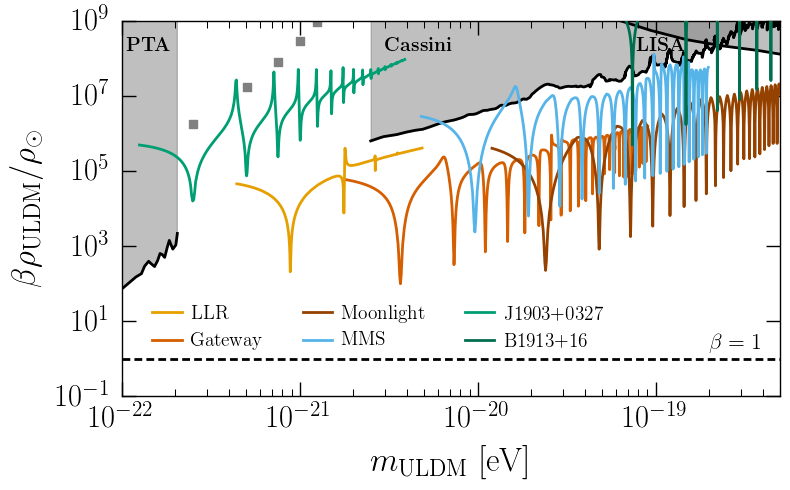

In [3]:
file_path = './data/uldm_data.h5'
file = h5py.File(file_path)


plt.subplots(figsize = (8, 5), ncols = 1)

#############################
###   Binary Resonances   ###
#############################

plt.plot(file['LLR'][0], file['LLR'][1], lw = 2,  color = 'C1', label = "LLR")
plt.plot(file['Gateway'][0], file['Gateway'][1], color = '#D55E00', lw = 2, zorder = np.inf, label = "Gateway")
plt.plot(file['Moonlight'][0], file['Moonlight'][1], color = '#954200', lw = 2, zorder = np.inf, label = "Moonlight")
plt.plot(file['MMS'][0], file['MMS'][1], color = 'C2', lw = 2, zorder = np.inf, label = "MMS")
plt.plot(file['J1903+0327'][0], file['J1903+0327'][1], color = '#009E73', lw = 2, zorder = np.inf, label="J1903+0327")
plt.plot(file['B1913+16'][0], file['B1913+16'][1], color = '#006F50', lw = 2, zorder = np.inf, label = "B1913+16")

plt.scatter(file['Old'][0], file['Old'][1], color = 'grey', marker = 's')

###########################
###   Existing Limits   ###
###########################

plt.plot(file['PTAmvsρDig14'][0], file['PTAmvsρDig14'][1], color = 'black', lw = 2)
plt.fill_between(file['PTAmvsρDig14'][0], file['PTAmvsρDig14'][1], 1e15*np.ones_like(file['PTAmvsρDig14'][1]), color = 'grey', alpha = .5)

plt.plot(file['Cassini'][0], file['Cassini'][1], color = 'black', lw = 2)
plt.fill_between(file['Cassini'][0], file['Cassini'][1], 1e15*np.ones_like(file['Cassini'][1]), color = 'grey', alpha = .5)


plt.plot(file['LISA'][0], file['LISA'][1], color = 'black', lw = 2)
plt.fill_between(file['LISA'][0], file['LISA'][1], 1e15*np.ones_like(file['LISA'][1]), color = 'grey', alpha = .5)


#######################################
###   Basic Aspects of Formatting   ###
#######################################

plt.axhline(1, color = 'black', lw = 2, ls = '--')
plt.text(2e-19, 1.75, r'$\beta = 1$', fontsize = 16, color = 'black')


plt.text(1.05*1e-22, 1.5e9/10, r'\textbf{PTA}', fontsize = 14)
plt.text(3e-21, 1.5e9/10, r'\textbf{Cassini}', fontsize = 14)
plt.text(1.55*.5*1e-19, 1.55*1.5*0.625e8, r'\textbf{LISA}', fontsize = 14)

plt.xlim(1e-22, 1e-18/2)
plt.ylim(1e-1, 1e9)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$m_\mathrm{ULDM}$ [eV]')
plt.ylabel(r'$\beta \rho_\mathrm{ULDM}/\rho_\odot$')


plt.legend(loc="upper left", bbox_to_anchor=(0.02, 1.15*0.25), frameon=False, ncol = 3)

plt.tight_layout()
plt.savefig('./Plots/ULDM_Sensitivity.pdf')